### FIRST SIMULATION DATASET ANALYSIS

In this Jupyter Notebook we will analyze the first dataset provided by Dr. Langner.
The Dataset has the following characteristics:
The columns in csv file are
 - n -- number of the particle
size -- diameter (in meters), now it is equal to 1.0 for all objects
 - x,y,z -- initial position (meters) in Dimorphos rotating reference frame (IAU_Dimorphos)
 - vx,vy,vz -- initial velocities (meters/second) in Dimorphos rotating reference frame (IAU_Dimorphos)
 - t0 - initial time, in this case it is a dummy column with 0.0 for all objects
 - st - status; 0--survived; 1--escaped; 2--collision with Didimos; 3-- collision with Dimorphos
 - time_end -- time (days) when particle is removed from simulation (impact or escape time or 3000 for survivors). Note: for performance reasons the    current version of the code checks for escapes only at the end of each integration period, in this case it is 1 day, so for escaped objects the time_end is rounded up to a full day, but if you need better precision I can change it.
 - xfinal,yfinal,zfinal,vxfinal,vyfinal,vzfinal -- final positions of the object, these columns contents depend on the status. If st=0 (survived) it is the final position and velocity in barycentric reference frame (non rotating). If st=1 (escaped) -- the values are 0.0. If st=2 it is the impact position and velocity in Didimos rotating reference frame. And for st=3 it is  the impact position and velocity in Dimorphos rotating reference frame.

The object is considered to have escaped when it reaches the distance of 5*r_hill which is ~300 km. This distance is chosen to be simple and to give a very large margin for objects that are temporarily on escape trajectory to return to the system. If I choose a different definition of what we consider an escaped object, the times of escape will be different.


In [9]:
import pandas as pd

dataset_path = '../data/raw/1st_simulation_Langner.csv'

try:
    df = pd.read_csv(dataset_path)
    print("Dataset uploaded succesfully")
except FileNotFoundError:
    print(f"Error: file not found for path: {dataset_path}")
except Exception as e:
    print(f"An error occurred: {e}")

#Check if the DataFrame has been uploaded succesfully

print(df.head())


Dataset uploaded succesfully
   n  size          x          y          z        vx        vy        vz  \
0  1   1.0  -4.263844 -83.024745 -10.340867  0.033040 -0.088055 -0.033979   
1  2   1.0   0.933023 -83.051149 -10.585260  0.053433 -0.079447 -0.028861   
2  3   1.0  -9.297767 -81.321275 -14.435677 -0.012998 -0.065771 -0.074197   
3  4   1.0 -10.952091 -81.127219 -14.462322 -0.012467 -0.094318 -0.030801   
4  5   1.0 -15.406269 -82.785294  -5.903712 -0.033877 -0.093496 -0.010530   

    t0  st    time_end     xfinal     yfinal     zfinal   vxfinal   vyfinal  \
0  0.0   1   82.000000   0.000000   0.000000   0.000000  0.000000  0.000000   
1  0.0   1   80.000000   0.000000   0.000000   0.000000  0.000000  0.000000   
2  0.0   3    4.442850 -16.523756  78.020506  19.320183  0.014316 -0.059958   
3  0.0   1  237.000000   0.000000   0.000000   0.000000  0.000000  0.000000   
4  0.0   3  159.380358 -21.288058  65.137333 -33.949623  0.174760  0.003633   

    vzfinal  
0  0.000000  
1  0.

#### VISUAL ANALYSIS
We start by looking at the 6 initial variables separately [x, y, z, vx, vy, vz] to see if any of those has a strong impact on the possible outcome. We will use box plots (violin plots) to confront the distribution of each feature with respect to the outcome class.

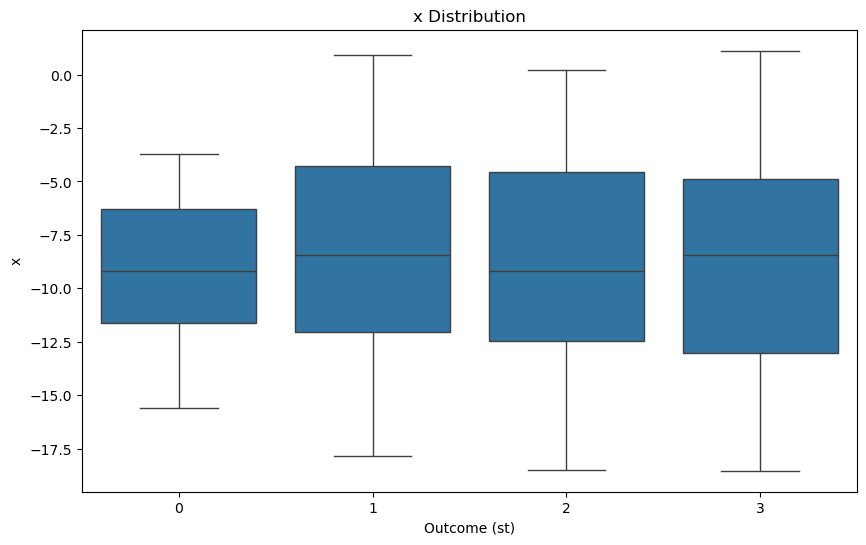

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#Extract the features from the DataFrame [x, y, z, vx, vy, vz]
features = ['x', 'y', 'z', 'vx', 'vy', 'vz']
target = 'st'

#Box Plot for variable 'x'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='st', y='x')
plt.title(f'x Distribution')
plt.xlabel('Outcome (st)')
plt.ylabel('x')
plt.show()

We do the same here but for all the features in the same plot.

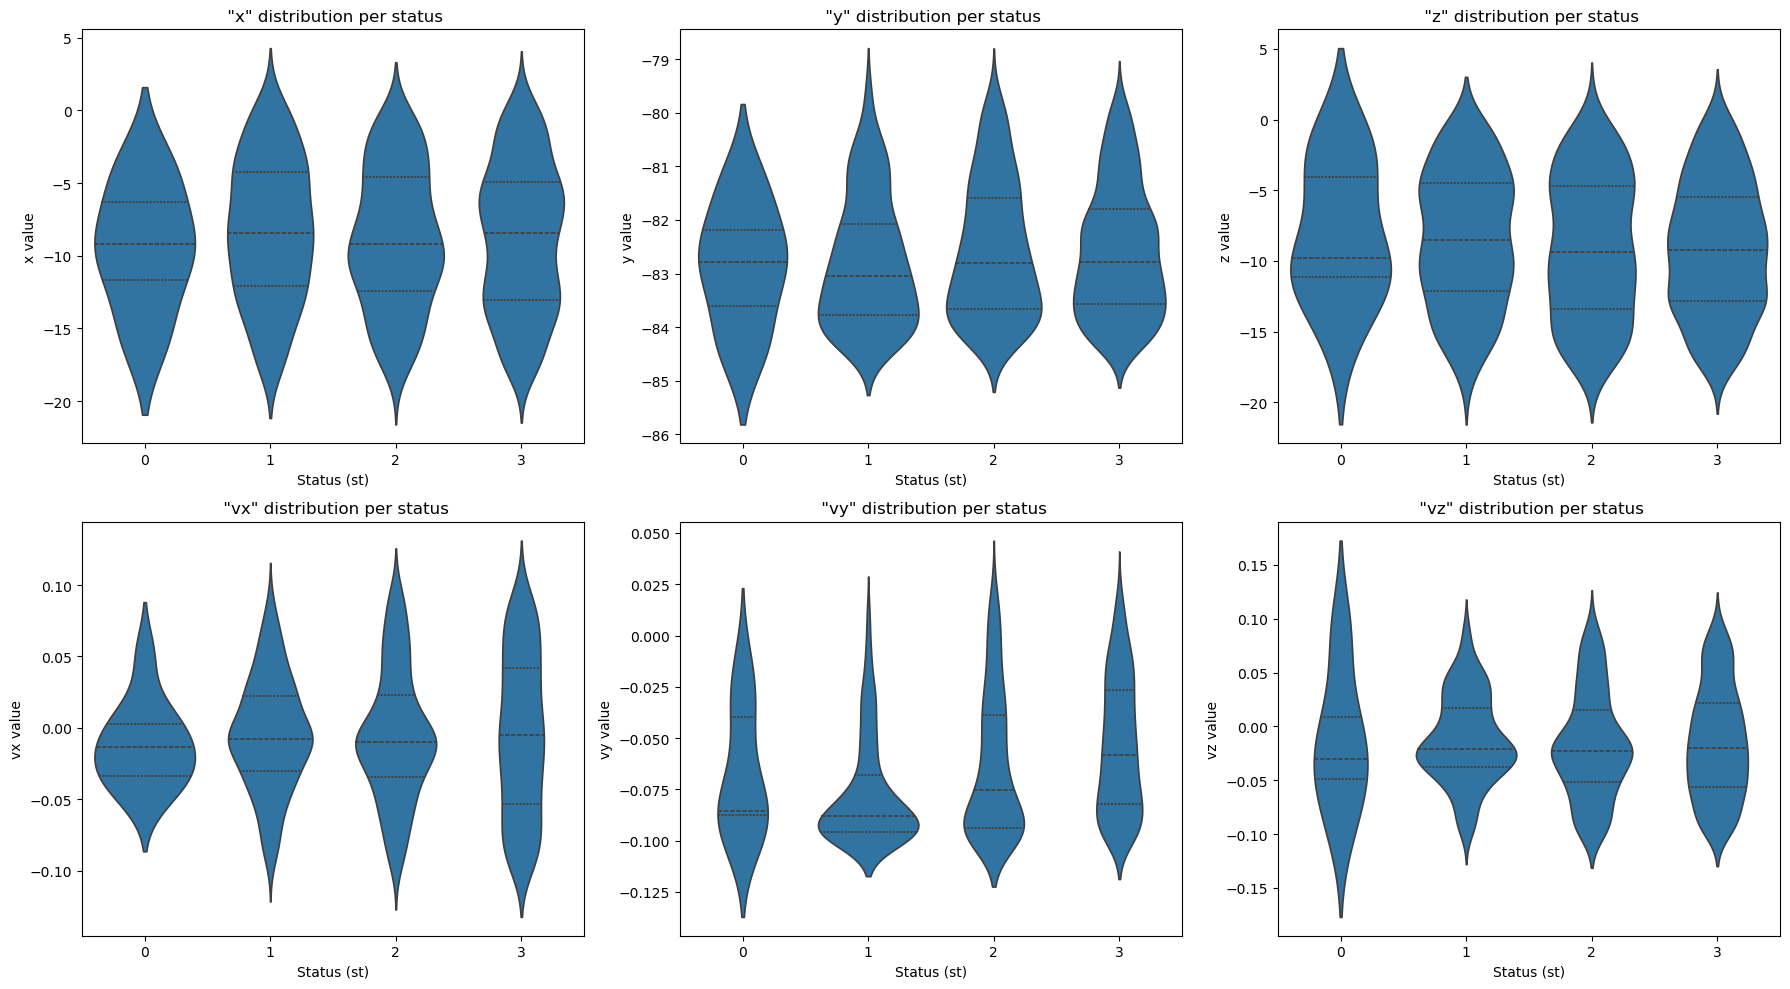

In [11]:
#Create a 2x3 grid for all the plots together
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))

for feat, ax in zip(features, axes.flatten()):
    """
    axes.flatten() converts the 2x3 grid in a 1D array [ax1, ax2, ..., ax6],
    while zip pairs each feature to the corresponding ax.
    """

    #Create the violin plot (combines boxplot with density estimate)
    sns.violinplot(data=df, x=target, y=feat, ax=ax, inner='quartile')

    ax.set_title(f' "{feat}" distribution per status')
    ax.set_xlabel('Status (st)')
    ax.set_ylabel(f'{feat} value')

plt.tight_layout()
plt.show()

#st - status; 0--survived; 1--escaped; 2--collision with Didimos; 3-- collision with Dimorphos


From this first set of violin plots it's hard to come to any conclusion. The median value is similar for all the outcomes so this indicates that the possible outcomes are a product of the contiribution of more variables at ones; for this purpose we switch to Pair Plots.


#### PAIR PLOTS
We start looking at pairs of variables with a pairplot. This type of plot creates a grid where on the diagonal we have histograms of every variable (same as the violin plot). On al the other plots there is a scatter of each feature against the others, colored base on the outcome.

Generazione del Pairplot in corso... (potrebbe richiede un po' di tempo)


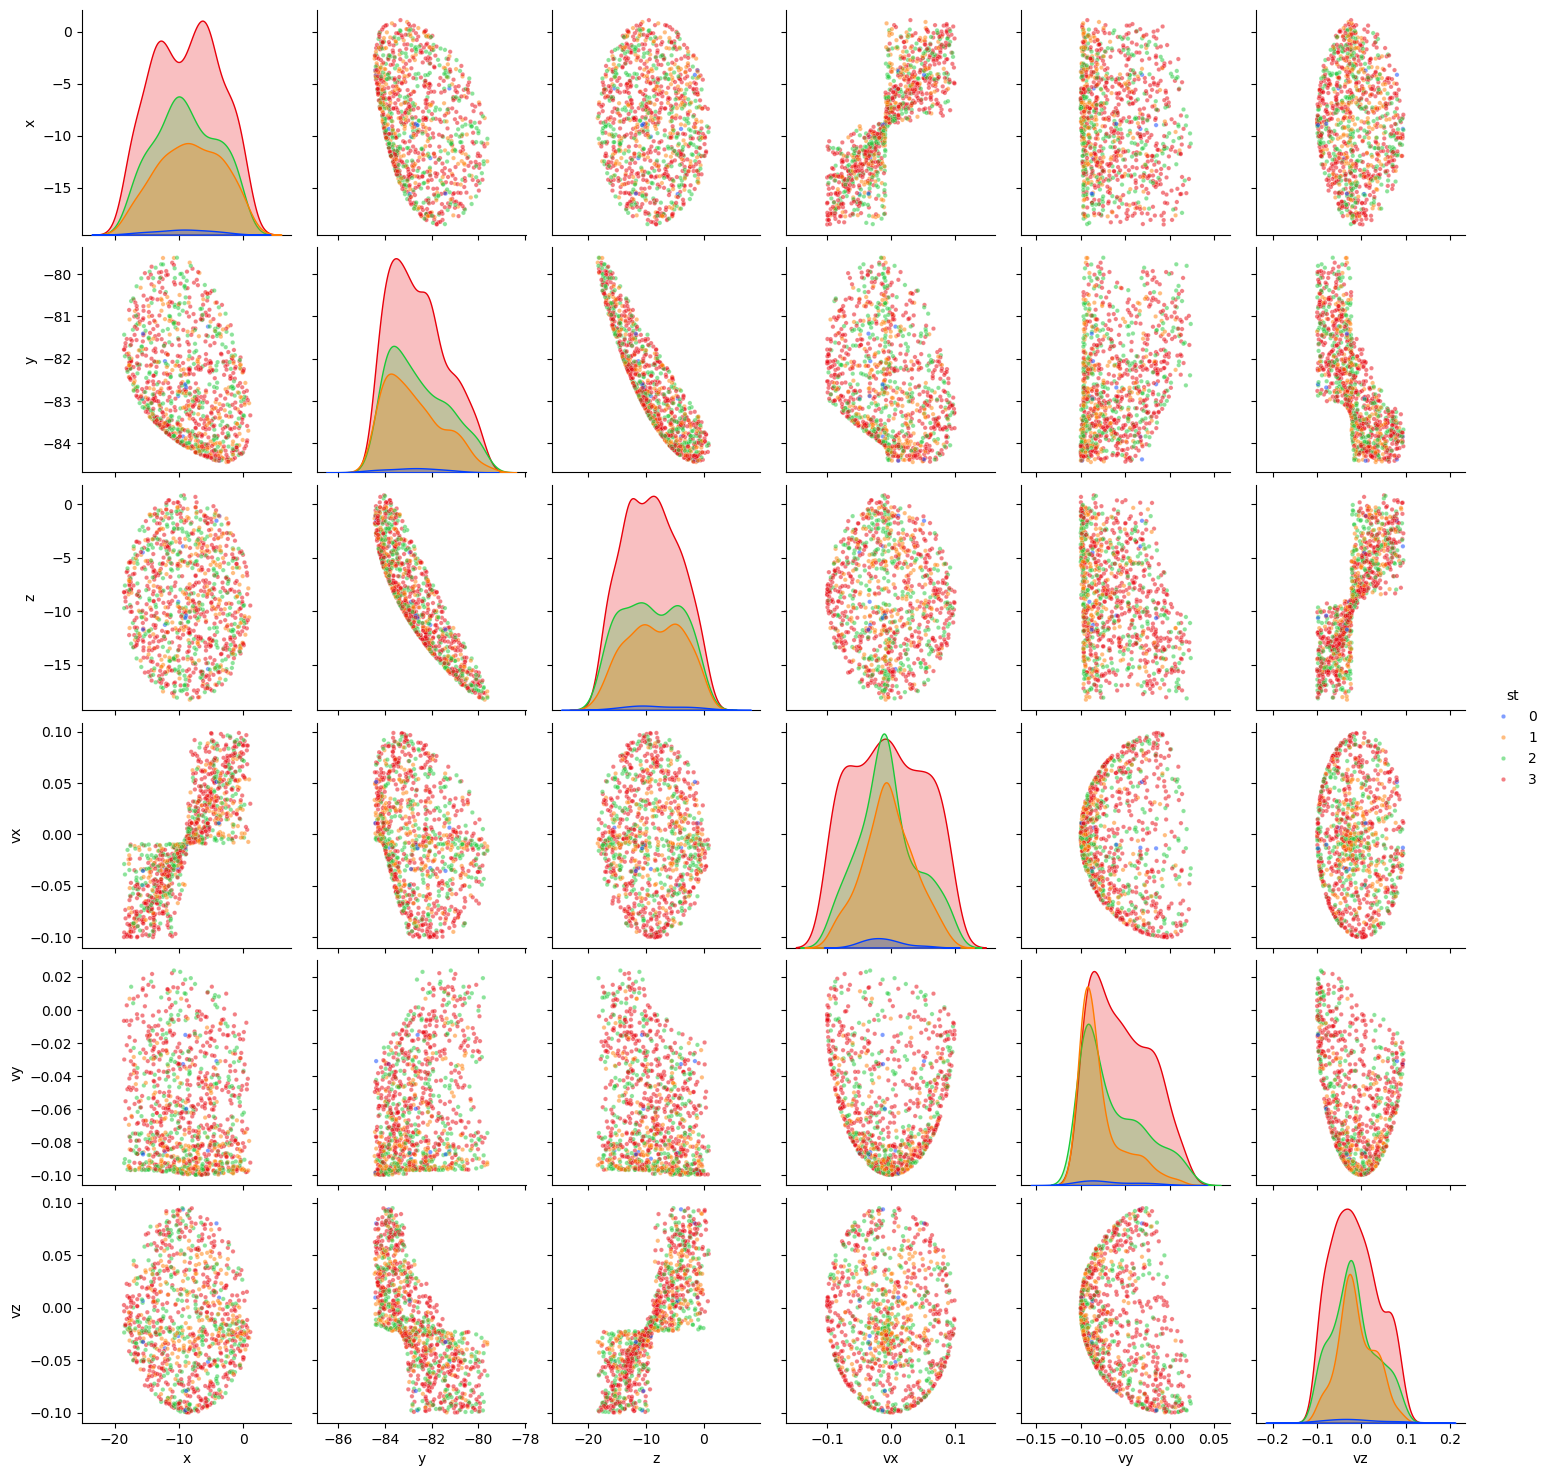

In [14]:
#Create a PairPlot
#Add 'st' to the list of columns to plot to use as colour
print("Generazione del Pairplot in corso... (potrebbe richiede un po' di tempo)")
sns.pairplot(data=df[features + [target]],
             hue=target,
             palette='bright',
             plot_kws={'alpha': 0.5, 's': 10})

plt.show()